# *Main Projects (Python): Exploring Data Insights Through K-Means Clustering*

## **Executive Summary**

Intel’s problem appears to fit the first fundamental marketing problem all firms face while formulating marketing strategy, i.e. multiple factors are working together in multifaceted ways to make all smartwatches differ in the market.

In order to decide who to partner with, Intel must carefully select the best customer segment
to target and decide what features to include and omit to optimize the watch for the segment.
The partner they choose should depend on what segment of smartwatch customers they
decide to target and what unique benefits they aim to provide.

### **Objectives**
Intel must carefully select the best customer segment to target and decide what features to include and omit to optimize the watch for the segment.
The partner they choose should depend on what segment of smartwatch customers they decide to target and what unique benefits they aim to provide.

**Intel needs to answer the following questions:**
1. How many distinct and meaningful segments are present in the market?
2. How would you describe each identified segment?

### **Technique Used**


### **Key Findings**

The output reveals that **3 clusters are more optimal than 4** as indicated by a score of 0.176. The first segment has no significant mean value higher than 4.0. Then, I might need to consider these respondents as **“Casual Tech Enthusiasts”**. This segment has moderate ratings for the smartwatch but might not prioritize any specific feature (See Appendix A).

Looking at the second cluster, “CostCom”, “TimelyInf”, “TaskMgm” and “DeviceSt” have over 4.5 which suggests the high importance of the device technology performance and durability, this segment might be called **“Tech Geeks”**. This segment prioritized advanced features on the device.

In the third cluster, features such as “ConstCom”, “Wellness”, “Athlete” and “Style” provided significant preferences with over 5.0, indicating a huge consideration for their health tracking, sports activities stylish design, this segment may be labeled **“Stylish Sports Enthusiast”**. This segment prioritized aesthetics and advanced features in their smartwatch.

### **Brief Data Description**
Intel conducted a survey with university alumni who graduated after 1996. A total of about
1,000 alumni complete the survey, a response rate of 2%. The data file consists of the
following variables (e.g., product attributes) which are based on the key questions in the
conducted survey.

**Attributes** Participatians rated (1 = “very unimportant” to 7 = “very important”)
- **ConstCom** (= Constant communication): The ability to receive subtle notifications at all
times about messages and emails from family, friends, and work.
- **TimelyInf** (= Timely information): The ability to receive up-to-the-minute smart (based
on context) traffic updates, route updates on directions, etc.
- **TaskMgm** (= Task management): The ability to automate tasks or perform them instantly,
such as placing an online order as soon as something is running low
- **DeviceSt** (= Device sturdiness): The ability not to worry about losing or damaging the
device or having to recharge its battery.
- **Wellness** (= Well-being): The ability to receive subtle reminders and smart goals to sleep
regularly, take enough steps each day, change position (not sit too much), and breathe
deeply.
- **Athlete** The ability to receive challenging fitness and athletic goals, smart coaching to
improve performance
- **Style** The ability to wear stylish, fashion-forward accessories that look great with many
outfits.

**Other Attributes**
- **AmznP**: Do you have an Amazon Prime account? (1 = Yes, 0 = No.)
- **Female**: What is your gender? (1 = Female, 0 = Male)
- **Degree**: What best describes your highest level of education? (1: Undergraduate degree,
2: Master’s degree or higher, such as an M.D. or Ph.D.)
- **Income**: What best describes your annual household income? (1 = Below $40K, 2 = $40-
$70K, 3 = $71-100K, 4 = $101K-$175K, 5 = Greater than $175K.)
- **Age**: How old are you? Measured in years.

### **Import Libraries**

In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
#from sklearn_extra.cluster import KMedoids
import scipy.stats
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **Read the Data**

In [2]:
data = pd.read_excel("SmartWatch Data File.xlsx")
columns = data.columns
data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,3,2,3,3,2,3,3,1,1,1,2,38
1,6,6,6,6,5,3,1,1,0,2,3,38
2,7,4,4,4,6,4,1,0,0,1,3,42
3,7,5,4,5,5,4,4,1,0,2,5,35
4,7,4,2,6,3,2,4,1,0,1,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37
996,7,7,6,5,5,2,5,1,0,1,5,36
997,5,6,7,7,4,3,5,1,0,1,5,40
998,1,1,4,3,2,4,3,1,0,1,1,39


## **Identify the dateset**

The dataset is **well-structured and clean** with all values represented as integers, indicating no errors or inconsistencies. Additionally, there are **no missing values**, which allows for a thorough analysis without the need for data imputation. Given this clarity and completeness, I can confidently proceed to check for outliers in the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ConstCom   1000 non-null   int64
 1   TimelyInf  1000 non-null   int64
 2   TaskMgm    1000 non-null   int64
 3   DeviceSt   1000 non-null   int64
 4   Wellness   1000 non-null   int64
 5   Athlete    1000 non-null   int64
 6   Style      1000 non-null   int64
 7   AmznP      1000 non-null   int64
 8   Female     1000 non-null   int64
 9   Degree     1000 non-null   int64
 10  Income     1000 non-null   int64
 11  Age        1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


## **Unique Value**

In [4]:
columns1 = ["ConstCom", "TimelyInf", "TaskMgm", "DeviceSt", "Athlete", "Style", "AmznP", "Female", "Degree", "Income", "Age"]
for i in columns1:
    unique = data[i].unique()
    print(f"{i} Unique Value: {unique}")

ConstCom Unique Value: [3 6 7 2 5 4 1]
TimelyInf Unique Value: [2 6 4 5 1 7 3]
TaskMgm Unique Value: [3 6 4 2 5 7 1]
DeviceSt Unique Value: [3 6 4 5 2 1 7]
Athlete Unique Value: [3 4 2 1 5 6 7]
Style Unique Value: [3 1 4 5 6 7 2]
AmznP Unique Value: [1 0]
Female Unique Value: [1 0]
Degree Unique Value: [1 2]
Income Unique Value: [2 3 5 4 1]
Age Unique Value: [38 42 35 36 47 41 46 28 30 32 40 37 25 45 33 26 39 43 34 31 27 44 24 29]


## **Check for outliers**

Identify outlier is important since it may indicate interesting patterns, anomalies, or errors in data collection, providing valuable insights for further investigation. In the boxplot, it can be seen that there is outlier in income attribute, but i decide not to handle it since i want to keep the originality of the dataset.

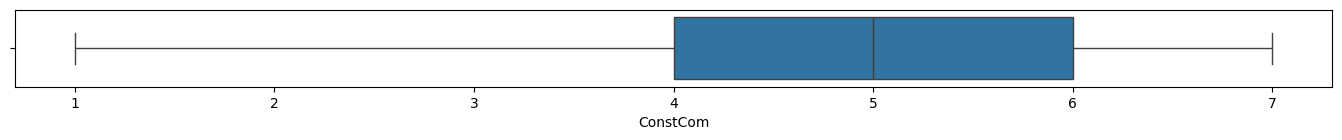

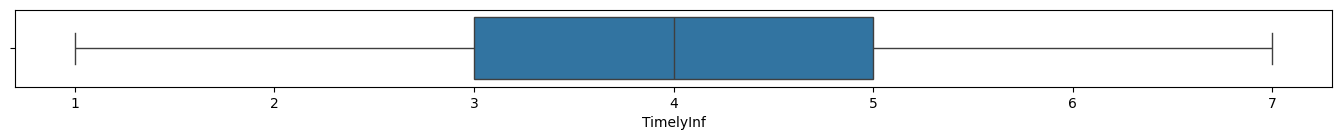

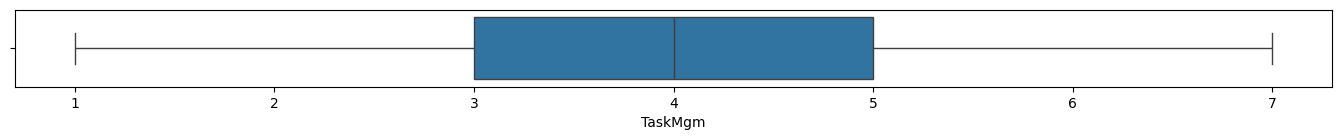

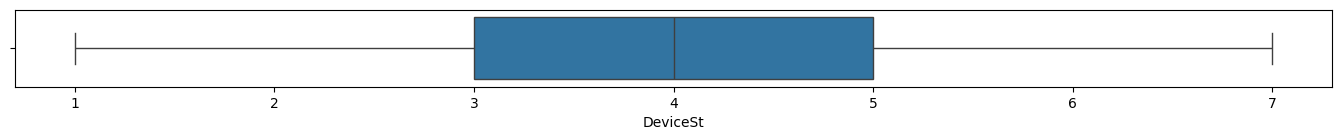

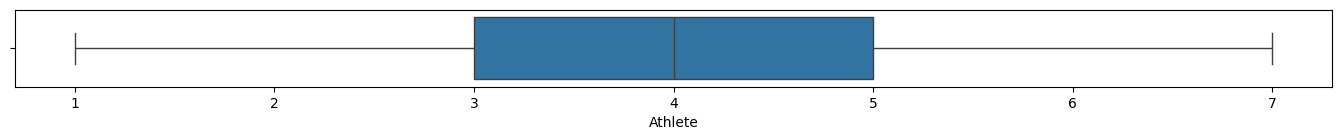

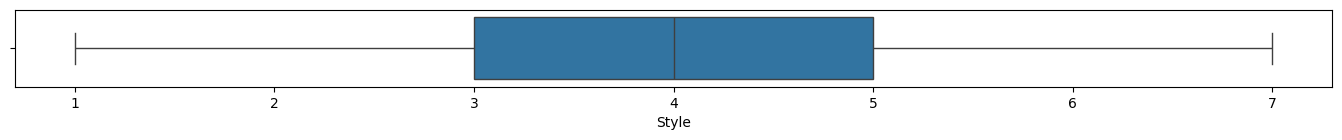

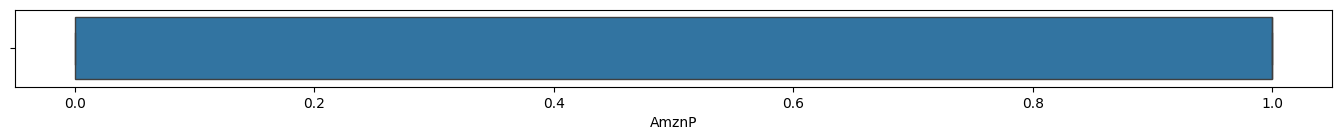

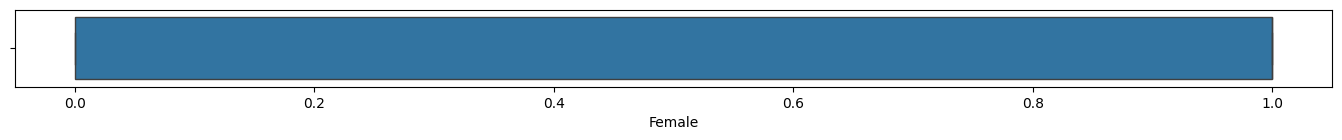

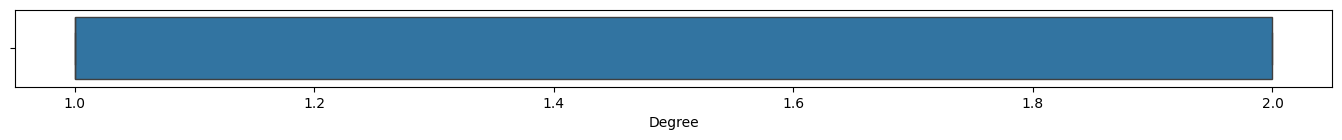

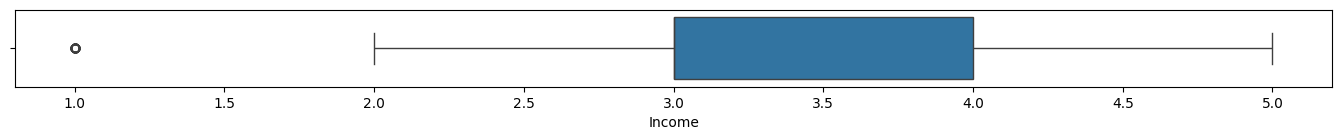

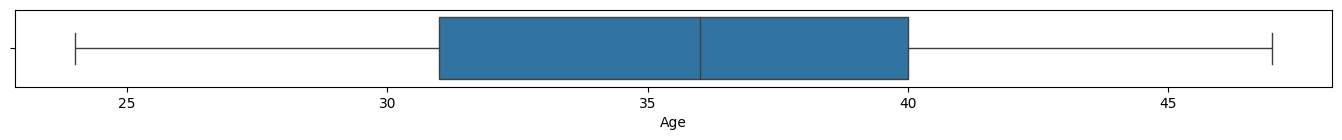

In [5]:
for i in data[["ConstCom", "TimelyInf", "TaskMgm", "DeviceSt", "Athlete", "Style", "AmznP", "Female", "Degree", "Income", "Age"]]:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data[["ConstCom", "TimelyInf", "TaskMgm", "DeviceSt", "Athlete", "Style", "AmznP", "Female", "Degree", "Income", "Age"]], x=i)

## **Explanatory data analaysis**

Using both mean and median allows analysts to gain a fuller picture of the data. The mean provides insight into the overall average, while the median offers a view of the central tendency that is less influenced by outliers

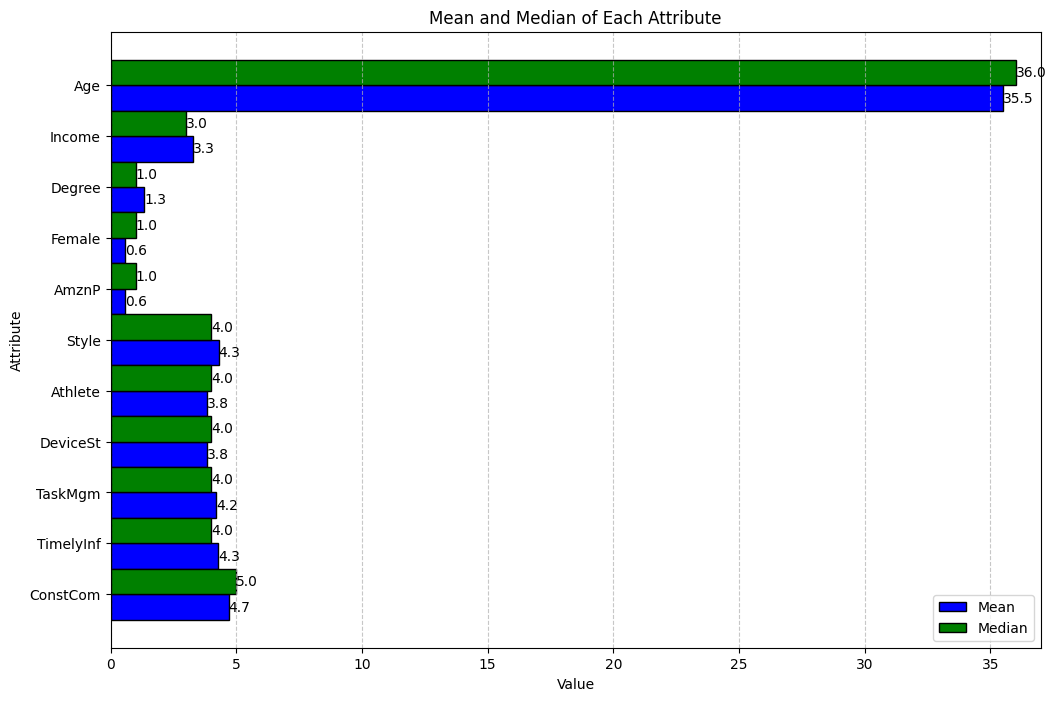

In [6]:
# Define Mean and Median as variable
mean_data = data[["ConstCom", "TimelyInf", "TaskMgm", "DeviceSt", "Athlete", "Style", "AmznP", "Female", "Degree", "Income", "Age"]].mean()
median_data = data[["ConstCom", "TimelyInf", "TaskMgm", "DeviceSt", "Athlete", "Style", "AmznP", "Female", "Degree", "Income", "Age"]].median()

# Set up the figure and axis
plt.figure(figsize=(12, 8))
bar_width = 0.5
index = np.arange(len(mean_data))

# Create bars for mean and median
bars_mean = plt.barh(index, mean_data.values, bar_width, label='Mean', edgecolor='black', color='blue')
bars_median = plt.barh(index + bar_width, median_data.values, bar_width, edgecolor='black', label='Median', color='green')

# Add value labels next to each bar
for bar in bars_mean:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.1f}', va='center', ha='left', fontsize=10)
for bar in bars_median:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.1f}', va='center', ha='left', fontsize=10)

# Set labels and title
plt.xlabel("Value")
plt.ylabel("Attribute")
plt.title("Mean and Median of Each Attribute")
plt.yticks(index + bar_width / 2, mean_data.index)
plt.xlim(0, max(mean_data.max(), median_data.max()) + 1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### **Scalling Data**

This analysis utilize StandardScaler for preparing data for machine learning models, especially when features have different attributes and scale. By standardizing the data, you ensure that each feature contributes equally to the model, leading to improved performance and faster convergence during training.

In [7]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data 

array([[-1.07752655, -1.46305719, -0.78467982, ..., -0.70498652,
        -1.14975745,  0.42375197],
       [ 0.83524247,  1.09250122,  1.1935046 , ...,  1.41846685,
        -0.2598523 ,  0.42375197],
       [ 1.47283214, -0.18527799, -0.12528501, ..., -0.70498652,
        -0.2598523 ,  1.10584769],
       ...,
       [ 0.1976528 ,  1.09250122,  1.85289941, ..., -0.70498652,
         1.51995799,  0.76479983],
       [-2.35270589, -2.1019468 , -0.12528501, ..., -0.70498652,
        -2.0396626 ,  0.5942759 ],
       [-2.35270589,  1.09250122,  1.85289941, ..., -0.70498652,
        -0.2598523 , -1.1109634 ]])

In [8]:
data = pd.DataFrame(scaled_data)
data.columns = columns
data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,-1.077527,-1.463057,-0.784680,-0.535521,-1.451216,-0.549373,-1.059359,0.879232,0.875662,-0.704987,-1.149757,0.423752
1,0.835242,1.092501,1.193505,1.377054,0.388095,-0.549373,-2.690397,0.879232,-1.141993,1.418467,-0.259852,0.423752
2,1.472832,-0.185278,-0.125285,0.102004,1.001198,0.125532,-2.690397,-1.137356,-1.141993,-0.704987,-0.259852,1.105848
3,1.472832,0.453612,-0.125285,0.739529,0.388095,0.125532,-0.243840,0.879232,-1.141993,1.418467,1.519958,-0.087820
4,1.472832,-0.185278,-1.444075,1.377054,-0.838112,-1.224278,-0.243840,0.879232,-1.141993,-0.704987,-0.259852,0.082704
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.197653,0.453612,0.534110,0.102004,1.001198,0.800438,1.387198,0.879232,-1.141993,1.418467,0.630053,0.253228
996,1.472832,1.731391,1.193505,0.739529,0.388095,-1.224278,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.082704
997,0.197653,1.092501,1.852899,2.014579,-0.225009,-0.549373,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.764800
998,-2.352706,-2.101947,-0.125285,-0.535521,-1.451216,0.125532,-1.059359,0.879232,-1.141993,-0.704987,-2.039663,0.594276


### **Check Optimal Cluster using Elbow Method**

The elbow method is a valuable tool for determining the optimal number of clusters due to its visual clarity, ability to highlight diminishing returns, simplicity, and effectiveness in balancing model complexity with data fit.

<function matplotlib.pyplot.show(close=None, block=None)>

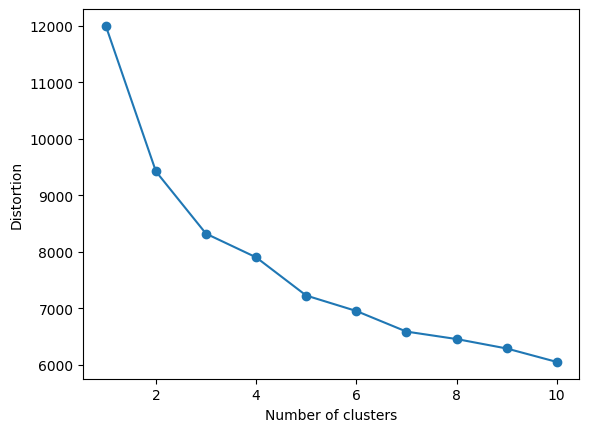

In [9]:
# Calculate distortion for a range of number of cluster Using Kmeans
distortions = []
for i in range(1,11):
    cluster = KMeans(n_clusters = i )
    cluster.fit(data)
    distortions.append(cluster.inertia_)
    
# plot
plt.plot(range(1,11),distortions,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

### **Check Optimal Cluster using Shilloute Score Method**

Using both the elbow method and the silhouette score method allows for a more robust and reliable determination of the optimal number of clusters, ensuring that the clustering solution is both statistically sound and meaningful.

In [10]:
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1999021939667023)
For n_clusters = 3, silhouette score is 0.17624842429186477)
For n_clusters = 4, silhouette score is 0.16256169636590284)
For n_clusters = 5, silhouette score is 0.1590730571285564)
For n_clusters = 6, silhouette score is 0.14587667555719752)
For n_clusters = 7, silhouette score is 0.1435914188660829)
For n_clusters = 8, silhouette score is 0.12800345489215387)
For n_clusters = 9, silhouette score is 0.12854761616285157)
For n_clusters = 10, silhouette score is 0.13645441122964408)


### **Plot the Clustering using K-Means**

K-Means clustering is effective because it is simple to implement and computationally efficient, making it suitable for large datasets. It provides clear and interpretable results, allowing for easy visualization of clusters. The algorithm is versatile and can be applied to various types of data, making it widely applicable in different domains. Additionally, K-Means can quickly converge to a solution, enabling rapid analysis and insights.

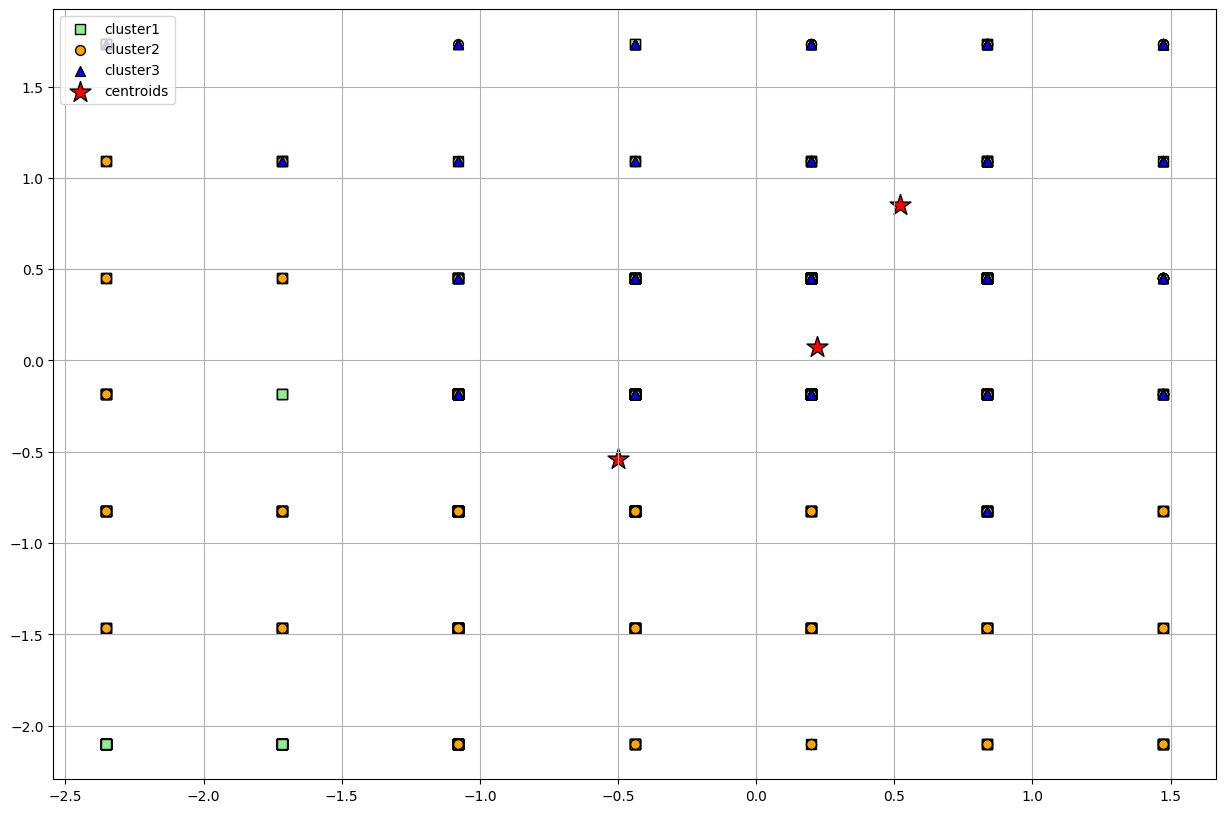

In [11]:
plt.figure(figsize=(15,10))
cluster1 = KMeans(n_clusters=3, random_state=0)
y = cluster1.fit_predict(data)

plt.scatter(data.iloc[y == 0, 0], data.iloc[y == 0, 1],
           s=50, c='lightgreen', marker='s', edgecolor='black',
           label='cluster1')

plt.scatter(data.iloc[y == 1, 0], data.iloc[y == 1, 1],
           s=50, c='orange', marker='o', edgecolor='black',
           label='cluster2')

plt.scatter(data.iloc[y == 2, 0], data.iloc[y == 2, 1],
           s=50, c='blue', marker='^', edgecolor='black',
           label='cluster3')

# plot the centroids
plt.scatter(cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:, 1],
           s=250, marker='*', c='red', edgecolor='black',
           label='centroids')

result_centroids_coordinates = cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:, 1]

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [12]:
data["clustering"] = y
data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age,clustering
0,-1.077527,-1.463057,-0.784680,-0.535521,-1.451216,-0.549373,-1.059359,0.879232,0.875662,-0.704987,-1.149757,0.423752,0
1,0.835242,1.092501,1.193505,1.377054,0.388095,-0.549373,-2.690397,0.879232,-1.141993,1.418467,-0.259852,0.423752,2
2,1.472832,-0.185278,-0.125285,0.102004,1.001198,0.125532,-2.690397,-1.137356,-1.141993,-0.704987,-0.259852,1.105848,2
3,1.472832,0.453612,-0.125285,0.739529,0.388095,0.125532,-0.243840,0.879232,-1.141993,1.418467,1.519958,-0.087820,2
4,1.472832,-0.185278,-1.444075,1.377054,-0.838112,-1.224278,-0.243840,0.879232,-1.141993,-0.704987,-0.259852,0.082704,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.197653,0.453612,0.534110,0.102004,1.001198,0.800438,1.387198,0.879232,-1.141993,1.418467,0.630053,0.253228,1
996,1.472832,1.731391,1.193505,0.739529,0.388095,-1.224278,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.082704,2
997,0.197653,1.092501,1.852899,2.014579,-0.225009,-0.549373,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.764800,2
998,-2.352706,-2.101947,-0.125285,-0.535521,-1.451216,0.125532,-1.059359,0.879232,-1.141993,-0.704987,-2.039663,0.594276,0


## **The Clustering Analysis**

When considering cluster segmentation for Intel products, three key techniques can be employed: **the Elbow Method, Silhouette Score, and K-Means clustering**. Each of these methods provides valuable insights into the optimal number of clusters, helping to ensure effective segmentation.

- **The Elbow Method** plot shows a significant drop in distortion (within-cluster sum of squares) as the number of clusters increases from 2 to 3. After 3 clusters, the rate of decrease in distortion slows down, indicating that adding more clusters yields diminishing returns. This suggests that 3 clusters effectively capture the structure of the data without overfitting.

- **The Silhouette Scores** for different cluster numbers indicate how well-separated the clusters are:

 1. For n_clusters = 2, the silhouette score is 0.1999, which is relatively low but indicates some separation.
 2. For n_clusters = 3, the score drops to 0.1762, suggesting that while the separation is not optimal, it is still reasonable.
 3. For n_clusters = 4, the score further decreases to 0.1626, indicating that the clusters are becoming less distinct.

- **Kmeans clustering** with 3 clusters, the model likely balances complexity and interpretability. Fewer clusters (like 2) may oversimplify the data, while more clusters (like 4 or 5) may complicate the interpretation without providing significant benefits in terms of separation.

## **Clustered Descriptive Statistics**

#### **Summary of Cluster 0**
- There are 397 observations in cluster 0, indicating a substantial sample size for analysis.
- The mean values for the attributes are all negative, suggesting that, on average, the respondents in this cluster rated these product features lower than the overall mean
- The standard deviations indicate the variability of responses within this cluster:
 1. ConstCom (0.974) and TimelyInf (0.931) show relatively high variability, suggesting diverse opinions on these features.
 2. TaskMgm (0.644) and DeviceSt (0.730) have moderate variability, while Athlete (0.653) shows lower variability compared to the others.

#### **Summary of Cluster 1**
- There are 384 observations in cluster 1, indicating a robust sample size for analysis.
- The mean values for the attributes are generally positive, suggesting that respondents in this cluster rated these product features higher than the overall mean.
- The standard deviations for most attributes are relatively high, indicating variability in responses within the cluster:
 1. TaskMgm has the highest standard deviation (1.03), suggesting diverse opinions on task management features.
 2. Wellness and Athlete have lower standard deviations, indicating more consistent positive ratings among respondents.

#### **Summary of Cluster 2**
- There are 219 observations in cluster 2, indicating a smaller but still significant sample size for analysis.
- The mean values for the attributes show a mix of positive and negative ratings.
 1. ConstCom: Mean of 0.5208, indicating a generally favorable perception of constant communication features.
 2. TimelyInf: Mean of 0.8504, suggesting a strong positive rating for timely information, indicating that respondents value this feature highly.
 3. TaskMgm: Mean of 0.4347, reflecting a moderate positive perception of task management features.
 4. DeviceSt: Mean of 0.7686, indicating a favorable view of device sturdiness.
 5. Wellness: Mean of -0.4098, suggesting that respondents rated wellness features lower than average, indicating less importance or satisfaction.
 6. Athlete: Mean of -0.8606, indicating a significantly lower rating for athletic features, suggesting that this aspect may not resonate well with this group.

In [13]:
for key,groups in data.groupby(by = "clustering"):
    print(f"this is group/clustering {key}")
    print(groups.describe())

this is group/clustering 0
         ConstCom   TimelyInf     TaskMgm    DeviceSt    Wellness     Athlete  \
count  397.000000  397.000000  397.000000  397.000000  397.000000  397.000000   
mean    -0.499360   -0.539323   -0.608620   -0.794064   -0.621905   -0.433772   
std      0.973698    0.930551    0.643977    0.730347    0.763823    0.652684   
min     -2.352706   -2.101947   -2.103469   -1.810571   -2.064319   -1.899183   
25%     -1.077527   -1.463057   -0.784680   -1.173046   -0.838112   -0.549373   
50%     -0.439937   -0.185278   -0.784680   -0.535521   -0.838112   -0.549373   
75%      0.197653   -0.185278   -0.125285   -0.535521   -0.225009    0.125532   
max      1.472832    1.731391    1.193505    2.014579    1.614302    1.475343   

            Style       AmznP      Female      Degree      Income         Age  \
count  397.000000  397.000000  397.000000  397.000000  397.000000  397.000000   
mean    -0.484182   -0.395739   -0.105213   -0.368015   -0.551257    0.551752   
